In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Kenya healthcare-stroke-data..csv')

# Display the first few rows to inspect the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Basic info about the dataset (data types, null values)
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Fill missing BMI values with the mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


In [6]:
# Check for missing values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

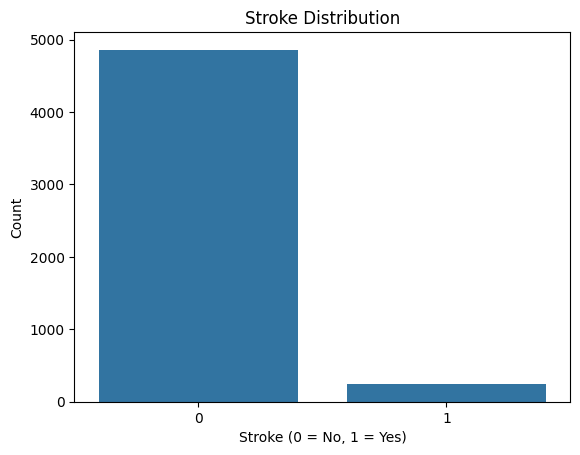

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'stroke' variable
sns.countplot(data=df, x='stroke')
plt.title('Stroke Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

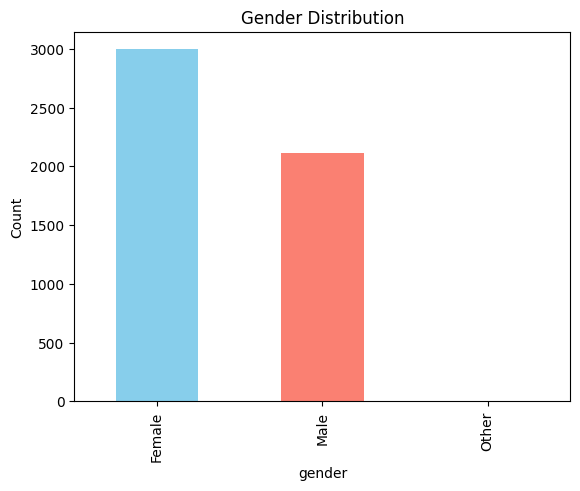

In [23]:
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()



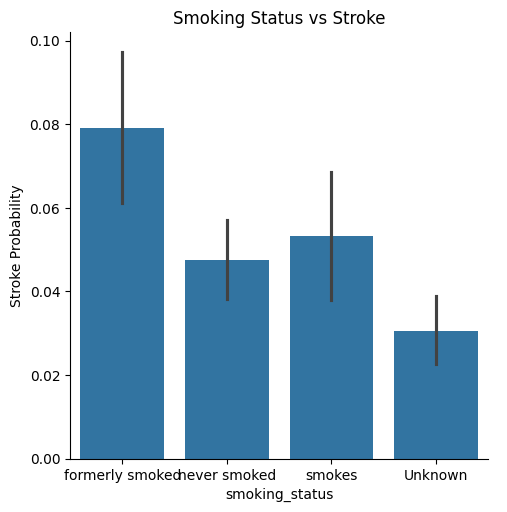

In [28]:
import seaborn as sns
g = sns.catplot(x="smoking_status", y="stroke", kind="bar", data=df)
g.set_ylabels("Stroke Probability")
plt.title('Smoking Status vs Stroke')
plt.show()


In [29]:
df[["hypertension", "stroke"]].groupby(["hypertension"], as_index=False).mean().sort_values(by="stroke", ascending=False)


,hypertension,stroke
1,1,0.132530
0,0,0.039679


In [30]:
df[["smoking_status", "stroke"]].groupby(["smoking_status"], as_index=False).mean().sort_values(by="stroke", ascending=False)


,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


In [31]:
df[["gender", "stroke"]].groupby(["gender"], as_index=False).mean().sort_values(by="stroke", ascending=False)


,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


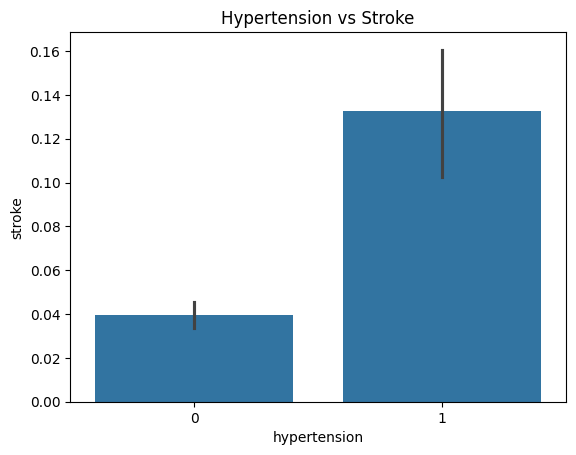

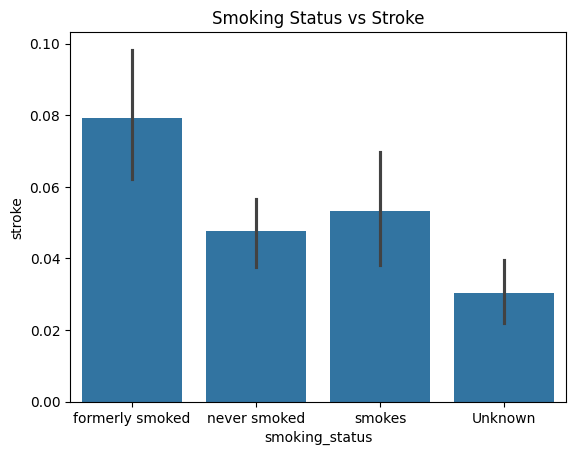

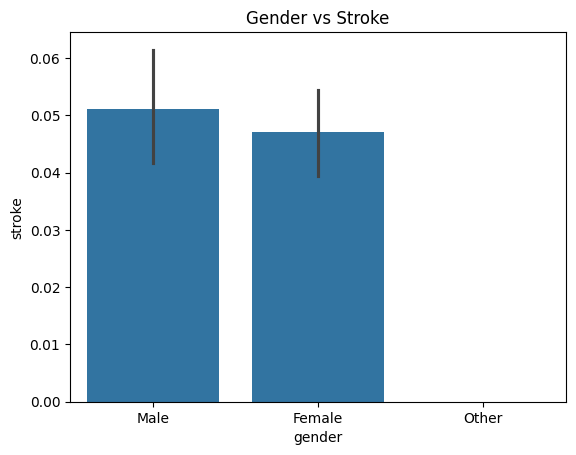

In [32]:
# Hypertension vs Stroke
sns.barplot(x="hypertension", y="stroke", data=df)
plt.title('Hypertension vs Stroke')
plt.show()

# Smoking Status vs Stroke
sns.barplot(x="smoking_status", y="stroke", data=df)
plt.title('Smoking Status vs Stroke')
plt.show()

# Gender vs Stroke
sns.barplot(x="gender", y="stroke", data=df)
plt.title('Gender vs Stroke')
plt.show()


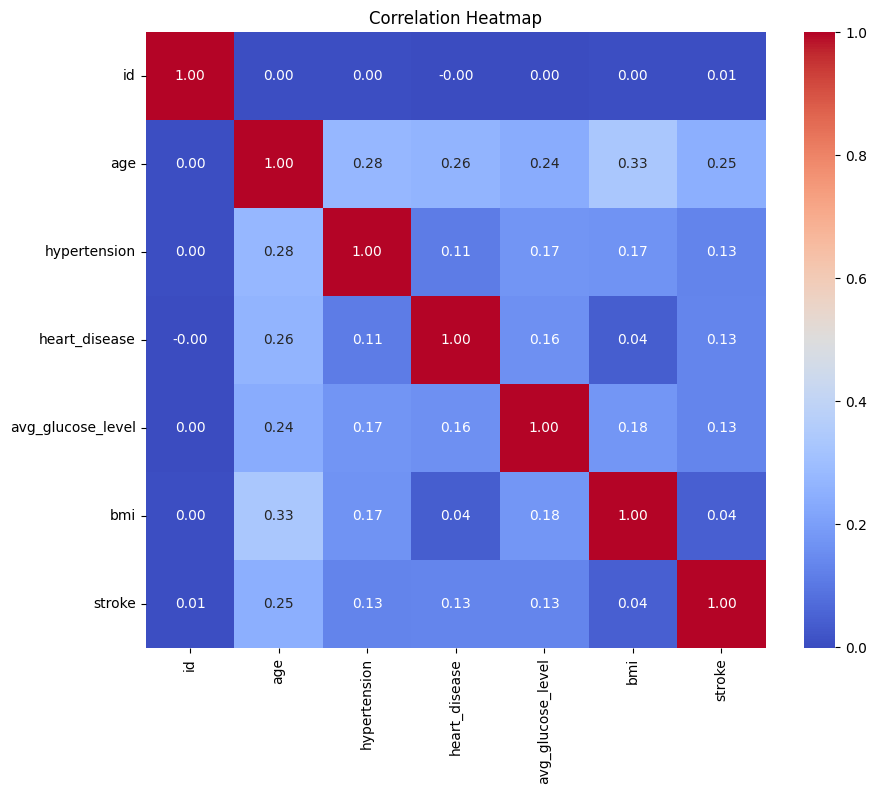

In [11]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


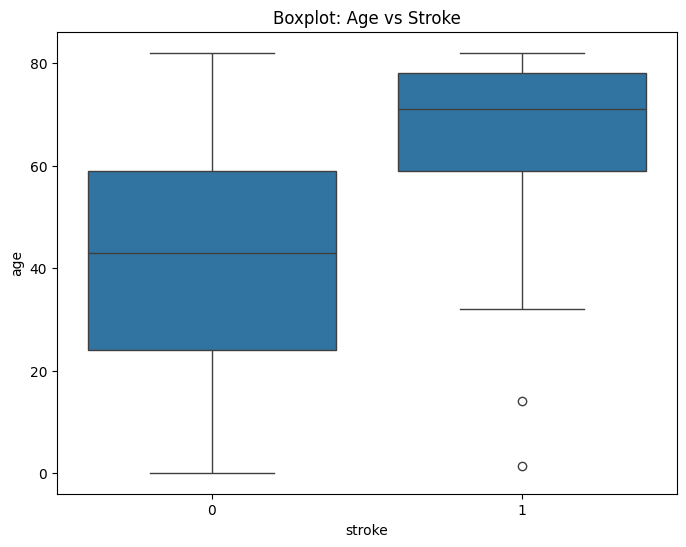

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Boxplot: Age vs Stroke')
plt.show()


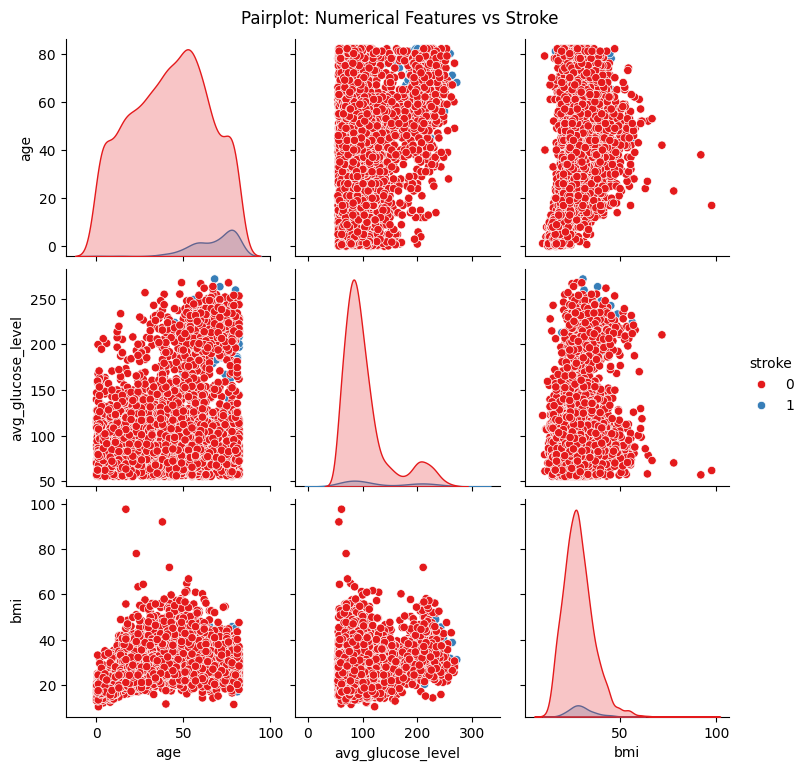

In [12]:
# Select numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Pairplot
sns.pairplot(df[numerical_columns + ['stroke']], hue='stroke', palette='Set1')
plt.suptitle('Pairplot: Numerical Features vs Stroke', y=1.02)
plt.show()
